In [17]:
pip install pandapower[all]

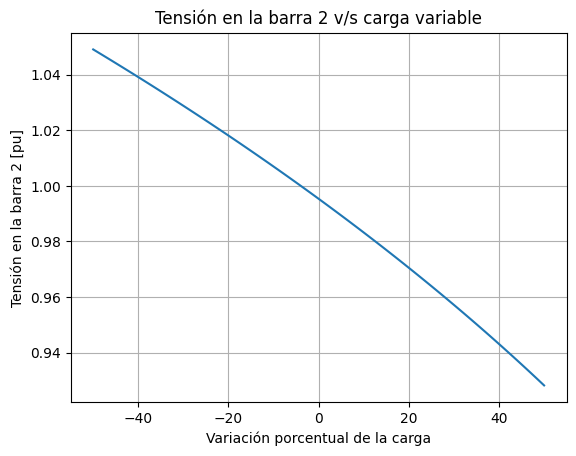

1.049076040189605
1.0480957831355706
1.0471121445353762
1.0461250992687579
1.04513462188418
1.0441406865927538
1.043143267262014
1.0421423374095435
1.0411378701964462
1.0401298384206634
1.039118214510126
1.0381029705157396
1.0370840781041986
1.0360615085506228
1.0350352327310102
1.0340052211145003
1.0329714437554496
1.031933870285297
1.0308924699042308
1.0298472113738177
1.0287980630032452
1.0277449926482936
1.026687967696424
1.0256269550588435
1.0245619211607853
1.0234928319315348
1.0224196527941913
1.0213423486551545
1.020260883893328
1.0191752223490331
1.0180853273126165
1.0169911615127514
1.015892687104412
1.0147898656565173
1.0136826581392289
1.0125710249108912
1.0114549257046062
1.0103343196144228
1.0092091650811357
1.0080794198776686
1.0069450410940424
1.0058059851218977
1.0046622076385685
1.003513663590681
1.0023603071772687
1.0012020918323787
1.0000389702071564
0.9988708941513864
0.9976978146944656
0.9965196820257984
0.995336445474579
0.9941480534889451
0.992954453614478
0.991

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandapower as pp
import math

#Para la creación de este modelo se asume un sistema trifásico, con voltaje linea-linea de 220[kV],
#analizamos el circuito equivalente para 1 fase 

#definimos los parámetros
f=50                          #frecuencia del sep
L=500                           #largo de la linea en [km]
r=0.02                          #resistencia de la linea en [ohm/km]
x=0.115                         #reactancia de la linea en [ohm/km]
b=19.1                          #capacitancia de la linea en [nF/km]
Vg_LN=500                       #voltaje de la linea en [kV]
Imax = 1                        #corriente maxima en las lineas [kV]

#respecto a la carga

Sc=1200                         #potencia aparente de la carga [MVA]
FP= 0.9                           #factor de potencia en la  carga
P=Sc*0.9                          #potencia activa en [Mw]
Q= math.sqrt((Sc**2)-(P**2))      #potencia reactiva en [Mvar]

# Crear red eléctrica
net = pp.create_empty_network()

# Añadir barras
bus1 = pp.create_bus(net, vn_kv=Vg_LN, name="Barra 1", slack=True)  # Barra 1 es designada como slack
bus2 = pp.create_bus(net, vn_kv=Vg_LN, name="Barra 2")  # Barra 2 se conecta la carga

# Añadir líneas
pp.create_line_from_parameters(net, from_bus=bus1, to_bus=bus2, length_km=L, r_ohm_per_km=r, x_ohm_per_km=x, c_nf_per_km=b, max_i_ka=Imax)
pp.create_line_from_parameters(net, from_bus=bus1, to_bus=bus2, length_km=L, r_ohm_per_km=r, x_ohm_per_km=x, c_nf_per_km=b, max_i_ka=Imax)
# Linea creada con parámetros vistos en en clases

# Añadir carga
pp.create_load(net, bus=bus2, p_mw=P, q_mvar=Q)

# Se añade fuente de generación conectada en la barra 1, (1[pu], el voltaje nominal [kV] se define en la barra a la que está conectada)
pp.create_ext_grid(net, bus=bus1, vm_pu=1, va_degree=0.0)

# Se definen funcion lineal para variar carga y lista para almacenar tensión en barra 2
niveles_carga = np.linspace(0.5, 1.5, 101)
tensiones_barra_dos = []

# Se ejecuta el programa dentro del for para cada variación puntual de carga
for carga in niveles_carga:
    net.load.loc[0, 'p_mw'] = P * carga
    net.load.loc[0, 'q_mvar'] = Q * carga

    pp.runpp(net)
    tension_barra_dos = net.res_bus.loc[1, 'vm_pu']
    tensiones_barra_dos.append(tension_barra_dos)

# Grafico de Tension, nivel de carga
plt.plot(niveles_carga*100-100, tensiones_barra_dos)
plt.xlabel('Variación porcentual de la carga')
plt.ylabel('Tensión en la barra 2 [pu]')
plt.title('Tensión en la barra 2 v/s carga variable')
plt.grid(True)
plt.show()
# para ver los valores puntuales de tensión
for tension in tensiones_barra_dos:
    print(tension)





In [2]:
import pandapower as pp
print(pp.__version__)

2.14.6
